In [1]:
# pip install shap

In [2]:
import pandas as pd
import modules

from modules import ml_functions

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

# 1.0 Data retrieval

In [3]:
df = pd.read_pickle('../../data_lake/output/2_dp.pkl')

In [4]:
df.sample(1)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
SegFile,,,,,,,,,,,,,,,,,,,,,,,,
CTG1203.txt,143.0,143.0,2.0,0.0,2.0,43.0,0.9,12.0,5.9,0.0,0.0,0.0,34.0,132.0,166.0,2.0,0.0,147.0,148.0,149.0,2.0,0.0,2.0,1.0


# 2.0 Data preparation

In [5]:
for i in df:
    if df[i].dtype == 'object':
        df[i] = df[i].astype(str)

In [6]:
# df = df.drop(columns='CLASS')

In [7]:
df_ml = df.copy()

# 3.0 Modeling
## 3.1 Classe 1

In [8]:
class_nsp = 1.0

In [9]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [10]:
model, X_test, y_test = ml_functions.model_training(df_model)

(942, 23)
AUC Score:  0.49550959874763123
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[0.99701217 0.9973444  0.9973444  0.9973444 ]

Mean CV Scores: 
[0.9840883  0.9854128  0.98807064 0.9854128 ]

Best Parameters: 
{'model__depth': 4, 'model__iterations': 500}



Test results...
Model Test Accuracy: 0.9682539682539683
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ASTV', 'MSTV', 'ALTV', 'DP', 'Mode', 'Variance', 'Width', 'UC', 'Max']


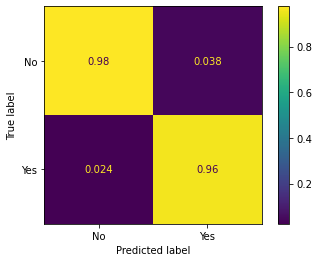

In [11]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [12]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

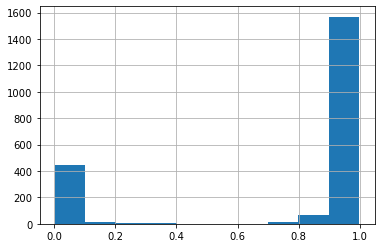

In [13]:
df['proba_classe_1.0'].hist()

## 3.2 Classe 2

In [14]:
class_nsp = 2.0

In [15]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [16]:
model, X_test, y_test = ml_functions.model_training(df_model)

(590, 23)
AUC Score:  0.5539356506750933
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[0.98244805 0.9836565  0.99273826 0.99515884]

Mean CV Scores: 
[0.96126947 0.96126947 0.96126947 0.95883044]

Best Parameters: 
{'model__depth': 2, 'model__iterations': 100}



Test results...
Model Test Accuracy: 0.9830508474576272
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['AC', 'ALTV', 'MSTV', 'DP', 'ASTV', 'Median', 'Nmax', 'Max', 'LBE', 'Variance']


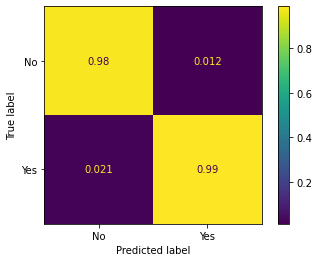

In [17]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [18]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

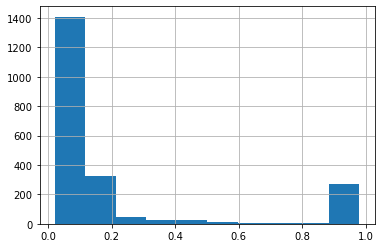

In [19]:
df['proba_classe_2.0'].hist()

## 3.3 Classe 3

In [20]:
class_nsp = 3.0

In [21]:
df_model, df_ml = ml_functions.model_preparation(df_ml,class_nsp)

In [22]:
model, X_test, y_test = ml_functions.model_training(df_model)

(352, 23)
AUC Score:  0.5562024182713837
Adversarial validation check: NO CONCEPT DRIFT: Train and Test set are statistical similar
GridSearchCV results...
Mean Train Scores: 
[1. 1. 1. 1.]

Mean CV Scores: 
[1. 1. 1. 1.]

Best Parameters: 
{'model__depth': 2, 'model__iterations': 100}



Test results...
Model Test Accuracy: 0.9905660377358491
--------------------------------------------------
Model Test Confusion Matrix
First ten features by importances:
['ASTV', 'Mean', 'Median', 'MSTV', 'DP', 'Mode', 'Variance', 'ALTV', 'AC', 'Width']


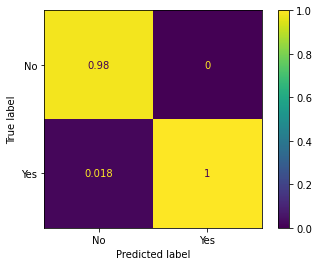

In [23]:
model = ml_functions.model_evaluation(model,X_test,y_test)

In [24]:
df = ml_functions.model_serving(df,model,class_nsp,X_test)

<AxesSubplot:>

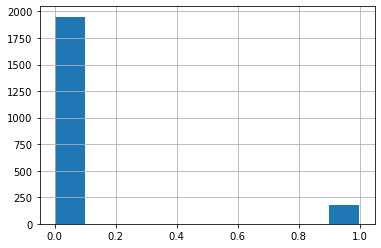

In [25]:
df['proba_classe_3.0'].hist()

# 4.0 Output

In [26]:
cols = ['proba_classe_1.0','proba_classe_2.0', 'proba_classe_3.0']

In [27]:
df[cols] = df[cols].apply(lambda x: x / x.sum(),axis=1)

In [29]:
df.sample(4)

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP,proba_classe_1.0,proba_classe_2.0,proba_classe_3.0
SegFile,,,,,,,,,,,,,,,,,,,,,,,,,,,
CTG1796.txt,121.0,121.0,0.0,1.0,4.0,66.0,2.1,0.0,0.0,10.0,1.0,0.0,102.0,55.0,157.0,5.0,1.0,67.0,83.0,90.0,98.0,-1.0,8.0,3.0,0.009677,0.047775,0.942548
CTG1558.txt,144.0,144.0,4.0,0.0,7.0,32.0,1.2,0.0,8.8,2.0,0.0,0.0,65.0,115.0,180.0,3.0,0.0,153.0,152.0,154.0,12.0,0.0,2.0,1.0,0.955719,0.043356,0.000924
CTG1868.txt,138.0,138.0,16.0,0.0,3.0,50.0,1.3,0.0,1.9,1.0,0.0,0.0,87.0,84.0,171.0,5.0,1.0,147.0,146.0,148.0,11.0,1.0,2.0,1.0,0.961141,0.037904,0.000955
CTG1179.txt,126.0,126.0,3.0,0.0,3.0,25.0,1.4,0.0,6.3,0.0,0.0,0.0,48.0,107.0,155.0,2.0,0.0,133.0,135.0,135.0,9.0,0.0,2.0,1.0,0.974155,0.024904,0.000941
